# Recurrent Neural Networks - Advanced

In [8]:
import numpy as np
import tensorflow as tf
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, SimpleRNN, TimeDistributed, LSTM, GRU, Conv1D

In [2]:
from rnn_utils import generate_time_series, plot_series, plot_multiple_forecasts, last_time_step_mse, plot_learning_curves


In [3]:
rndm_seed = 542
np.random.seed(rndm_seed)
tf.random.set_seed(rndm_seed)

## Data

In [4]:
np.random.seed(rndm_seed)
n_steps = 50

series = generate_time_series(10000, n_steps+10)
x_train, y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
x_val, y_val = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
x_test, y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

y = np.empty((10000, n_steps, 10))
for step in range(1, 10+1):
    y[:, :, step-1] = series[:, step:step + n_steps, 0]
    
y_train = y[:7000]
y_val = y[7000:9000]
y_test = y[9000:]

# For making forecasts
np.random.seed(rndm_seed+342)

series2 = generate_time_series(1, n_steps + 10)
x_new, y_new = series2[:, :n_steps, :], series2[:, n_steps:, :]

# print some shapes
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')

x_train shape: (7000, 50, 1)
y_train shape: (7000, 50, 10)


## LSTM

In [9]:
np.random.seed(rndm_seed)
tf.random.set_seed(rndm_seed)

model = Sequential([
        LSTM(20, return_sequences = True, input_shape = [None, 1]),
        LSTM(20, return_sequences = True),
        TimeDistributed(Dense(10))])
model.compile(loss = 'mse', optimizer = 'adam', metrics=[last_time_step_mse])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, None, 20)          1760      
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 20)          3280      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 10)          210       
Total params: 5,250
Trainable params: 5,250
Non-trainable params: 0
_________________________________________________________________


In [5]:
print('\n \n *** Training 10 steps-ahead LSTM model: *** \n')
history = model.fit(x_train, y_train, epochs = 20, 
          validation_data = (x_val, y_val))


 
 *** Training 10 steps-ahead LSTM model: *** 

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 14s 2ms/sample - loss: 0.0760 - last_time_step_mse: 0.0625 - val_loss: 0.0541 - val_last_time_step_mse: 0.0340
Epoch 2/20
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.0472 - last_time_step_mse: 0.0259 - val_loss: 0.0425 - val_last_time_step_mse: 0.0206
Epoch 3/20
7000/7000 [==============================] - 7s 1ms/sample - loss: 0.0384 - last_time_step_mse: 0.0170 - val_loss: 0.0359 - val_last_time_step_mse: 0.0150
Epoch 4/20
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.0342 - last_time_step_mse: 0.0141 - val_loss: 0.0329 - val_last_time_step_mse: 0.0131
Epoch 5/20
7000/7000 [==============================] - 8s 1ms/sample - loss: 0.0321 - last_time_step_mse: 0.0130 - val_loss: 0.0317 - val_last_time_step_mse: 0.0129
Epoch 6/20
7000/7000 [==============================] - 8s 1ms/sample -

In [6]:
y_pred = model.predict(x_new)[:, -1][..., np.newaxis]
print(f'x_new shape: {x_new.shape}')
print(f'y_new shape: {y_new.shape}')
print(f'Predictions shape: {y_pred.shape}')

ls_mse = np.mean(last_time_step_mse(y_new, y_pred))
mse = np.mean(mean_squared_error(y_new, y_pred))
print(f'Predictions last-TS MSE: {ls_mse}')
print(f'Predictions MSE: {mse}')

x_new shape: (1, 50, 1)
y_new shape: (1, 10, 1)
Predictions shape: (1, 10, 1)
Predictions last-TS MSE: 0.007179041393101215
Predictions MSE: 0.003940573427826166


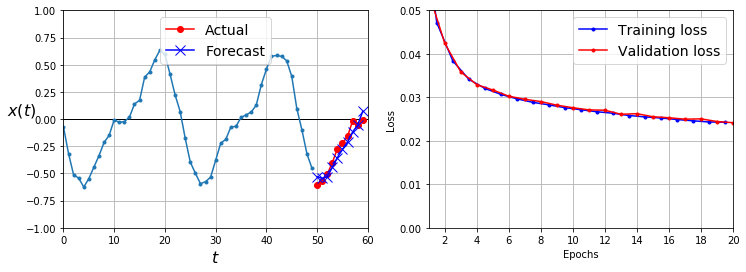

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

plt.sca(axes[0])
plot_multiple_forecasts(x_new, y_new, y_pred)

plt.sca(axes[1])
plot_learning_curves(history.history["loss"], history.history["val_loss"])

plt.show()

## GRU

In [12]:
np.random.seed(rndm_seed)
tf.random.set_seed(rndm_seed)

model = Sequential([
        GRU(20, return_sequences = True, input_shape = [None, 1]),
        GRU(20, return_sequences = True),
        TimeDistributed(Dense(10))])
model.compile(loss = 'mse', optimizer = 'adam', metrics=[last_time_step_mse])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, None, 20)          1380      
_________________________________________________________________
gru_3 (GRU)                  (None, None, 20)          2520      
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 10)          210       
Total params: 4,110
Trainable params: 4,110
Non-trainable params: 0
_________________________________________________________________


In [13]:
print('\n \n *** Training 10 steps-ahead LSTM model: *** \n')
history = model.fit(x_train, y_train, epochs = 20, 
          validation_data = (x_val, y_val))


 
 *** Training 10 steps-ahead LSTM model: *** 

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 14s 2ms/sample - loss: 0.0753 - last_time_step_mse: 0.0682 - val_loss: 0.0546 - val_last_time_step_mse: 0.0441
Epoch 2/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0502 - last_time_step_mse: 0.0405 - val_loss: 0.0472 - val_last_time_step_mse: 0.0378
Epoch 3/20
7000/7000 [==============================] - 10s 1ms/sample - loss: 0.0448 - last_time_step_mse: 0.0350 - val_loss: 0.0427 - val_last_time_step_mse: 0.0335
Epoch 4/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0402 - last_time_step_mse: 0.0294 - val_loss: 0.0375 - val_last_time_step_mse: 0.0252
Epoch 5/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0351 - last_time_step_mse: 0.0216 - val_loss: 0.0329 - val_last_time_step_mse: 0.0183
Epoch 6/20
7000/7000 [==============================] - 10s 1ms/sampl

In [14]:
y_pred = model.predict(x_new)[:, -1][..., np.newaxis]
print(f'x_new shape: {x_new.shape}')
print(f'y_new shape: {y_new.shape}')
print(f'Predictions shape: {y_pred.shape}')

ls_mse = np.mean(last_time_step_mse(y_new, y_pred))
mse = np.mean(mean_squared_error(y_new, y_pred))
print(f'Predictions last-TS MSE: {ls_mse}')
print(f'Predictions MSE: {mse}')

x_new shape: (1, 50, 1)
y_new shape: (1, 10, 1)
Predictions shape: (1, 10, 1)
Predictions last-TS MSE: 0.01204005442559719
Predictions MSE: 0.0026467982679605484


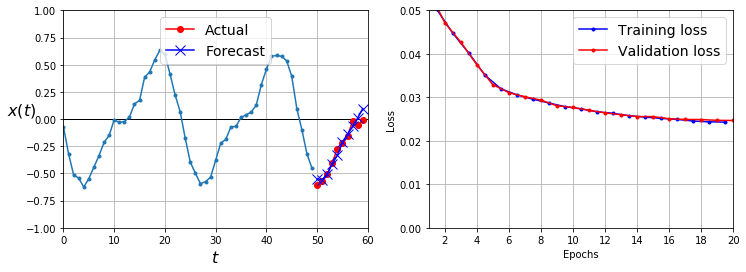

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

plt.sca(axes[0])
plot_multiple_forecasts(x_new, y_new, y_pred)

plt.sca(axes[1])
plot_learning_curves(history.history["loss"], history.history["val_loss"])

plt.show()

## GRU + Conv1D

In [16]:
np.random.seed(rndm_seed)
tf.random.set_seed(rndm_seed)

model = Sequential([
        Conv1D(filters = 20, kernel_size = 4, strides = 2, padding = 'valid', input_shape = [None, 1]),
        GRU(20, return_sequences = True),
        GRU(20, return_sequences = True),
        TimeDistributed(Dense(10))])
model.compile(loss = 'mse', optimizer = 'adam', metrics=[last_time_step_mse])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, None, 20)          100       
_________________________________________________________________
gru_4 (GRU)                  (None, None, 20)          2520      
_________________________________________________________________
gru_5 (GRU)                  (None, None, 20)          2520      
_________________________________________________________________
time_distributed_4 (TimeDist (None, None, 10)          210       
Total params: 5,350
Trainable params: 5,350
Non-trainable params: 0
_________________________________________________________________


In [17]:
print('\n \n *** Training 10 steps-ahead LSTM model: *** \n')
history = model.fit(x_train, y_train[:,3::2], epochs = 20, 
          validation_data = (x_val, y_val[:,3::2]))


 
 *** Training 10 steps-ahead LSTM model: *** 

Train on 7000 samples, validate on 2000 samples
Epoch 1/20
7000/7000 [==============================] - 9s 1ms/sample - loss: 0.0676 - last_time_step_mse: 0.0611 - val_loss: 0.0448 - val_last_time_step_mse: 0.0375
Epoch 2/20
7000/7000 [==============================] - 5s 728us/sample - loss: 0.0394 - last_time_step_mse: 0.0327 - val_loss: 0.0364 - val_last_time_step_mse: 0.0306
Epoch 3/20
7000/7000 [==============================] - 6s 794us/sample - loss: 0.0332 - last_time_step_mse: 0.0263 - val_loss: 0.0316 - val_last_time_step_mse: 0.0241
Epoch 4/20
7000/7000 [==============================] - 6s 791us/sample - loss: 0.0299 - last_time_step_mse: 0.0220 - val_loss: 0.0285 - val_last_time_step_mse: 0.0200
Epoch 5/20
7000/7000 [==============================] - 5s 766us/sample - loss: 0.0270 - last_time_step_mse: 0.0177 - val_loss: 0.0258 - val_last_time_step_mse: 0.0153
Epoch 6/20
7000/7000 [==============================] - 5s 699us

In [18]:
y_pred = model.predict(x_new)[:, -1][..., np.newaxis]
print(f'x_new shape: {x_new.shape}')
print(f'y_new shape: {y_new.shape}')
print(f'Predictions shape: {y_pred.shape}')

ls_mse = np.mean(last_time_step_mse(y_new, y_pred))
mse = np.mean(mean_squared_error(y_new, y_pred))
print(f'Predictions last-TS MSE: {ls_mse}')
print(f'Predictions MSE: {mse}')

x_new shape: (1, 50, 1)
y_new shape: (1, 10, 1)
Predictions shape: (1, 10, 1)
Predictions last-TS MSE: 0.015898771584033966
Predictions MSE: 0.003879124764353037


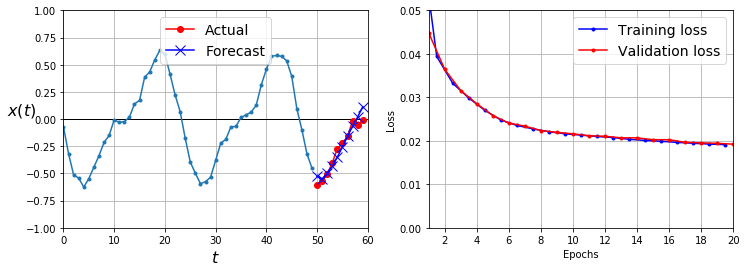

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

plt.sca(axes[0])
plot_multiple_forecasts(x_new, y_new, y_pred)

plt.sca(axes[1])
plot_learning_curves(history.history["loss"], history.history["val_loss"])

plt.show()